## Perceptron - Prima indians  Diabetes Dataset

Conjunto datso disponible en sklearn.dataset.fetch_openml. este conjunto de datos contiene infomracion clinica de pacientes como nivel de glucosa, presion arterial

## Obtencion de datos

In [1]:
# Carga los paquetes requeridos
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, classification_report
from sklearn.datasets import fetch_openml

In [2]:
# Cargar el dataset desde OpenML
diabetes = fetch_openml(name= 'diabetes', version = 1, as_frame = True)
df = diabetes.frame

In [3]:
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   preg    768 non-null    int64   
 1   plas    768 non-null    int64   
 2   pres    768 non-null    int64   
 3   skin    768 non-null    int64   
 4   insu    768 non-null    int64   
 5   mass    768 non-null    float64 
 6   pedi    768 non-null    float64 
 7   age     768 non-null    int64   
 8   class   768 non-null    category
dtypes: category(1), float64(2), int64(6)
memory usage: 49.0 KB


## Preprocesamiento

In [4]:
# separar caracteristicas (x) y etiqueta (y)
# Obetener X eliminando la columna de etiqueta
X = df.drop(columns = ['class'])
# Obetner Y covirtiendo la etiqueta en un valor numerico
y = df['class'].apply(lambda X: 1 if X == 'tested_positive' else 0)

In [5]:
# Dividir el dataset en entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 26, stratify = y)

In [6]:
# Estandarizar las caracteristicas(importante para el perceptron)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

## Entrenamineto del Perceptron

In [7]:
# Crear y entrenar el perceptron
perceptron = Perceptron(max_iter = 1000, eta0= 0.01, random_state= 26)
perceptron.fit(X_train, y_train)

Perceptron(eta0=0.01, random_state=26)

In [8]:
# Realizar predicciones
y_pred = perceptron.predict(X_test)

## Evaluacion de la eficiencia del modelo

In [9]:
eficiencia = accuracy_score(y_test, y_pred)
print(f'Precision del perceptron: {eficiencia:2f}')
print('\nReporte de clasificiacion:')
print(classification_report(y_test, y_pred))

Precision del perceptron: 0.766234

Reporte de clasificiacion:
              precision    recall  f1-score   support

           0       0.85      0.78      0.81       100
           1       0.65      0.74      0.69        54

    accuracy                           0.77       154
   macro avg       0.75      0.76      0.75       154
weighted avg       0.78      0.77      0.77       154



## Matrices de peso

In [10]:
# Obtener los pesos (matriz de coeficientes)
pesos = perceptron.coef_
# Obtener el sesgo( termino de sesgo o bias)
sesgo = perceptron.intercept_

In [11]:
# Mostrar los resultados
print('Matrin de pesos:')
print(pesos)
print('\nVector de sego(bias)')
print(sesgo)

Matrin de pesos:
[[ 0.01439627  0.05285947 -0.00581887  0.01734709 -0.00393253  0.01565109
   0.03479192  0.00115098]]

Vector de sego(bias)
[-0.01]


## Grafica de frontera de decision

In [12]:
import matplotlib.pyplot as plt

In [13]:
# Seleccionar solo dos caracteristicas [glucosa e IMC]
X_subset= X_train[:,[1,5]]
y_subset = y_train

In [14]:
perceptron.fit(X_subset, y_subset)

Perceptron(eta0=0.01, random_state=26)

In [15]:
# Obtener pesos y bias
w = perceptron.coef_
b = perceptron.intercept_
w

array([[0.00995078, 0.00732233]])

In [16]:
# crear una linea de decision
x1_min, x1_max = X_subset[:,0].min(), X_subset[:,0].max()
x2_min, x2_max = X_subset[:,1].min(), X_subset[:,1].max()
x1_values = np.linspace(x1_min, x1_max, 100)
x2_values = (-w[0][0])/w[0][1]* x1_values-(b[0]/w[0][1])

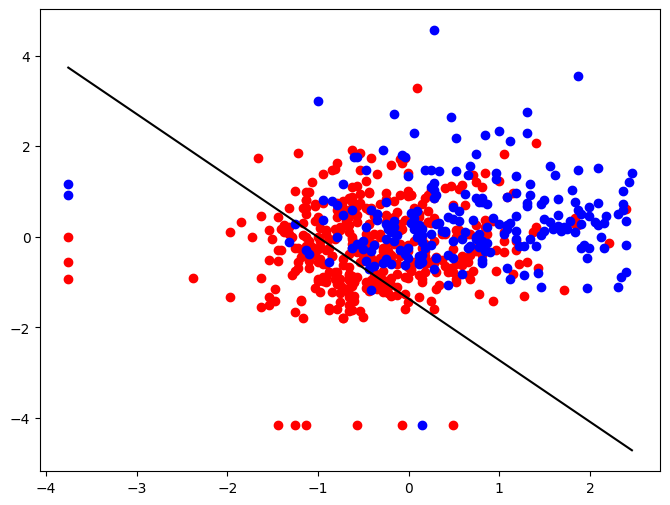

In [17]:
# graficar puntos de datos
plt.figure(figsize= (8,6))
plt.scatter(X_subset[y_subset == 0][:,0], X_subset[y_subset == 0][:,1], color = 'red', label = 'No diabetes');
plt.scatter(X_subset[y_subset == 1][:,0], X_subset[y_subset == 1][:,1], color = 'blue', label = 'diabetes');
plt.plot(x1_values, x2_values, 'k', label = 'Frontera de decision');

In [18]:
from sklearn.neural_network import MLPClassifier

# Crear un perceptron multicapa con 1 capa oculta de 5 neuronas
mlp = MLPClassifier(hidden_layer_sizes=(5,2,), activation='logistic', max_iter=1000, random_state=26)

# Entrenar el modelo
mlp.fit(X_train, y_train)

# Verificar la cantidad de capas
print(f"Numero de capas en la red: {len(mlp.coefs_)} (Incluye capa oculta y salida)")
print(f"Neuronas en la capa oculta: {mlp.hidden_layer_sizes[0]}")

Numero de capas en la red: 3 (Incluye capa oculta y salida)
Neuronas en la capa oculta: 5


In [19]:
# Obtener pesos y bias
w = mlp.coefs_
b = mlp.intercepts_
print(w)
print(b)

[array([[-0.64018824, -0.52590957,  0.72305173,  0.64494526, -0.28017041],
       [-1.44189521, -1.36303398,  1.4386384 ,  1.50937392, -1.40331646],
       [ 0.22732518,  0.32624801, -0.37175247, -0.33324465,  0.24542416],
       [ 0.02956135,  0.33070614,  0.04019845, -0.17574068,  0.09773754],
       [-0.01764609, -0.01756224,  0.23521631, -0.04178848,  0.06990925],
       [-0.82061915, -0.70425559,  0.92192306,  0.9548518 , -0.73521169],
       [-0.35043506, -0.26528824,  0.61512136,  0.43506852, -0.53000217],
       [-0.04757726, -0.72407248, -0.15234284,  0.3241658 , -0.43969265]]), array([[ 1.73027077,  1.40857035],
       [ 0.69786205,  1.25740122],
       [-1.30717121, -1.39731241],
       [-2.02626723, -1.46438406],
       [ 1.39389827,  1.29250838]]), array([[-0.9636261 ],
       [-1.76329801]])]
[array([ 0.01016638, -0.09037613, -0.24825133,  0.02631829,  0.07385195]), array([-0.25349534, -0.60741639]), array([0.51300132])]


In [20]:
# Realizar predicciones
y_pred2 = mlp.predict(X_test)

In [21]:
eficiencia2 = accuracy_score(y_test, y_pred2)
print(f'Precision del perceptron multicapa: {eficiencia2:.2f}')
print('\nReporte de clasificacion:')
print(classification_report(y_test, y_pred2))

Precision del perceptron multicapa: 0.77

Reporte de clasificacion:
              precision    recall  f1-score   support

           0       0.79      0.87      0.83       100
           1       0.70      0.57      0.63        54

    accuracy                           0.77       154
   macro avg       0.75      0.72      0.73       154
weighted avg       0.76      0.77      0.76       154

